In [81]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [82]:
import os
import json
import numpy as np
import pandas as pd
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    cohen_kappa_score,
    matthews_corrcoef,
    roc_auc_score,
    precision_recall_curve,
    average_precision_score,
)
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Dict, Tuple, Union, Optional

from utils import load_json, save_json

In [83]:
from evaluate import (
    load_predicted_results,
    align_evaluation_data,
    compute_basic_metrics)

In [95]:
# Example usage
experiment_id = 1
experiment_dir = f"./outputs/experiment_{str(experiment_id)}/output_dev"
dev_data_file = "data/dev_subset.csv" 

# Load results
df_pred = load_predicted_results(experiment_dir)
df_true = pd.read_csv(dev_data_file)

# Align data
y_true, y_pred, dialect_true, dialect_pred, ids = align_evaluation_data(df_true, df_pred)


Number of samples in merged data: 172


In [85]:
compute_basic_metrics(y_true, y_pred)

{'accuracy': 0.7906976744186046,
 'precision_macro': 0.7727464907830205,
 'recall_macro': 0.7514434578793953,
 'f1_macro': 0.7499194295357365,
 'precision_weighted': 0.7829420492489941,
 'recall_weighted': 0.7906976744186046,
 'f1_weighted': 0.7769253478723113}

In [86]:
# classification report
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

def print_classification_report(y_true, y_pred):
    # Convert the lists to numpy arrays
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Print the classification report
    print(classification_report(y_true, y_pred))

# Print the classification report
print_classification_report(y_true, y_pred)

              precision    recall  f1-score   support

    negative       0.86      0.93      0.89        67
     neutral       0.70      0.44      0.54        43
    positive       0.75      0.89      0.81        62

    accuracy                           0.79       172
   macro avg       0.77      0.75      0.75       172
weighted avg       0.78      0.79      0.78       172



Confusion Matrix:


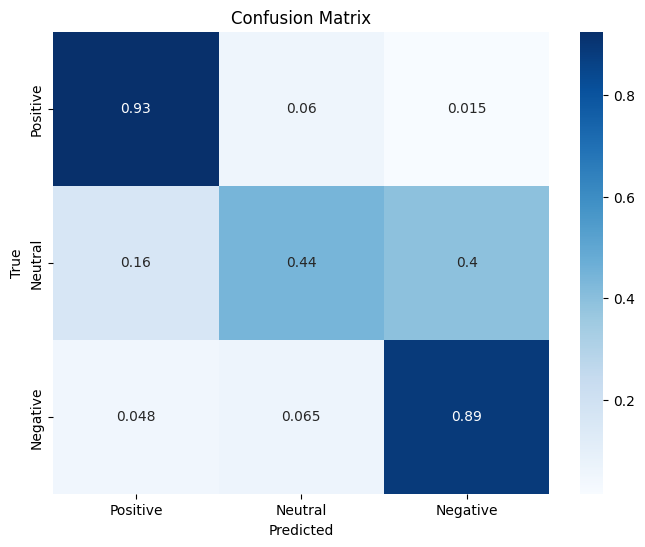

In [87]:
# plot cm matric

import matplotlib.pyplot as plt
import seaborn as sns

# Print the confusion matrix
cm = confusion_matrix(y_true, y_pred, normalize='true')
print("Confusion Matrix:")


def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Plot the confusion matrix
plot_confusion_matrix(cm, labels=['Positive', 'Neutral' ,'Negative'])

In [107]:
# Error analysis - identify misclassified examples
misclassified = [i for i, (true, pred) in enumerate(zip(y_true, y_pred)) if true != pred]

# Print misclassification statistics
print(f"Total misclassified: {len(misclassified)}/{len(y_true)} ({len(misclassified)/len(y_true)*100:.2f}%)")


Total misclassified: 36/172 (20.93%)


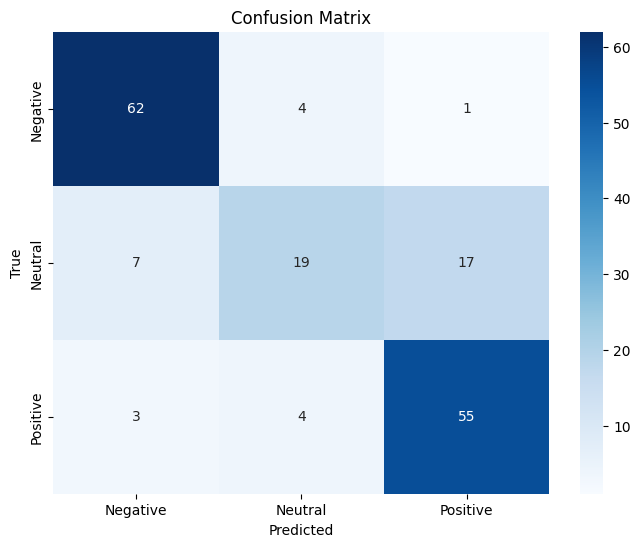

In [108]:
# Create confusion matrix for detailed error analysis
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [96]:
# error analysis
for i,a,b in zip(ids, y_true, y_pred):
    if a != b:
        print(f"ID: {i}, True: {j}, Predicted: {k}")

(['negative',
  'positive',
  'neutral',
  'negative',
  'neutral',
  'negative',
  'negative',
  'neutral',
  'neutral',
  'negative',
  'positive',
  'positive',
  'positive',
  'negative',
  'positive',
  'positive',
  'negative',
  'positive',
  'positive',
  'negative',
  'negative',
  'neutral',
  'positive',
  'positive',
  'negative',
  'negative',
  'positive',
  'positive',
  'neutral',
  'negative',
  'negative',
  'negative',
  'negative',
  'negative',
  'neutral',
  'positive',
  'negative',
  'negative',
  'neutral',
  'neutral',
  'positive',
  'negative',
  'positive',
  'positive',
  'positive',
  'positive',
  'positive',
  'positive',
  'positive',
  'positive',
  'positive',
  'negative',
  'negative',
  'negative',
  'positive',
  'negative',
  'positive',
  'neutral',
  'neutral',
  'negative',
  'positive',
  'positive',
  'positive',
  'negative',
  'negative',
  'positive',
  'negative',
  'negative',
  'positive',
  'positive',
  'negative',
  'positive',
  '

In [106]:
df_true[df_true['ID'] == 799.0]

,ID,Sentiment,Text,Dialect


In [105]:
df_true

,ID,Sentiment,Text,Dialect
0,799.0,negative,موظف المستودع السوداني يحتاج دورات في التعامل ...,Saudi
1,643.0,positive,الراحة كاملة السكن كان ممتاز يوفر كل الراحة وا...,Darija
2,1167.0,neutral,النقص فالتكلفة واضح بزاف، الغرف مزيانة والتشطي...,Darija
3,1970.0,negative,كانت الغرفة صغيرة والحمام وسخ ومكان الشور فيه ...,Saudi
4,840.0,neutral,كنطلب يهتمو بالكليان اكثر. كنعطيه تقييم مزيان.,Darija
...,...,...,...,...
167,962.0,negative,خايس لما كلمت مدير الفندق عن الحشرة اللي لقيته...,Saudi
168,777.0,positive,للمره الثالثة على التوالي استمتعنا بالسكن في ف...,Saudi
169,1784.0,neutral,كان فيه مجموعة فنادق و احنا نزلنا في اخر واحد ...,Saudi
170,903.0,positive,و ضيقو لي المساحة الكبيرة ديال الاطفال و كبرو ...,Darija
